# Plot Settings

In [1]:
import os
import sys
from pathlib import Path

# Set root and data directories
ROOT_DIR = Path(os.getcwd()).resolve().parent.parent
sys.path.insert(0,str(ROOT_DIR))
from path import DATA_DIR

print("ROOT_DIR:", ROOT_DIR)
print("DATA_DIR:", DATA_DIR)


ROOT_DIR: /root/project/reproducity
DATA_DIR: /data/sequential_data


In [2]:
import pickle
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib as mpl
mpl.use("Agg")
import matplotlib.pyplot as plt
%matplotlib inline

# Configure Matplotlib styles

mpl.rcParams.update({
    "axes.labelsize": 7,
    "xtick.labelsize": 5,
    "ytick.labelsize": 5,
    "legend.frameon": False,
    "legend.fontsize": 3,
    "axes.linewidth": 0.5,
    "pdf.fonttype": 42,
    "figure.dpi": 300,
})


# Figure3A

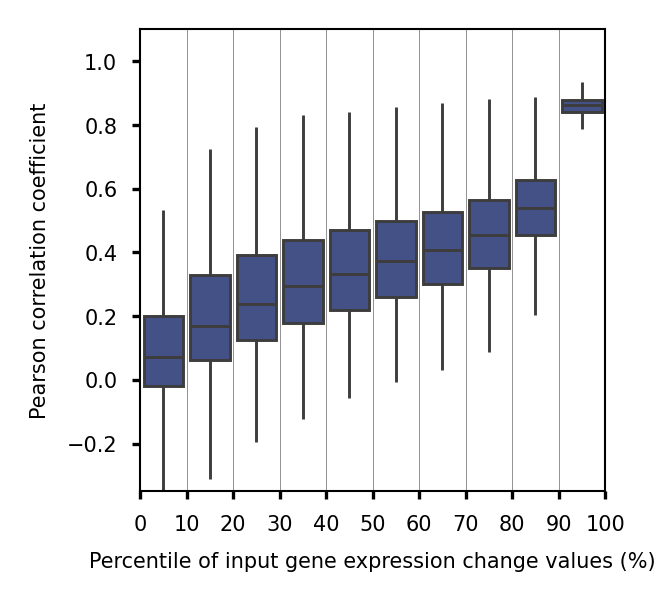

In [3]:
with open(DATA_DIR / "result_2025/state_transition_model/default_model/LinearRegression.pkl", "rb") as f:
    plot_df = pickle.load(f)

fig,ax =plt.subplots(figsize=(2,2))

ax.vlines(np.arange(0,11)-0.5, -3, 3, colors='grey', linewidth=0.2)
sns.boxplot(x="label", y="pcc", data=plot_df, ax=ax, width=0.85, fliersize=0, linewidth=0.7, color="#394A92", showcaps=False) 


ax.set_xticks(np.arange(0,11)-0.5)
ax.set_xticklabels([str(i*10) for i in np.arange(0,11)])

ax.set_xlabel('Percentile of input gene expression change values (%)', fontsize=5)
ax.set_ylabel('Pearson correlation coefficient', fontsize=5)

ax.tick_params(axis='x', direction='out', length=2) 
ax.tick_params(axis='y', direction='out', length=2)


ax.set_ylim(-0.35, 1.1)
plt.show()
#

# Figure 3B

In [4]:
with open(DATA_DIR / "result_2025/state_transition_model/default_model/24vs48_plot_data.pkl", "rb") as f:
    plot_df1, plot_df2 = pickle.load(f)
plot_df = pd.concat([plot_df1, plot_df2])
plot_df["type"] = ["24h prediction"] * plot_df1.shape[0] + ["48h prediction"] * plot_df2.shape[0]

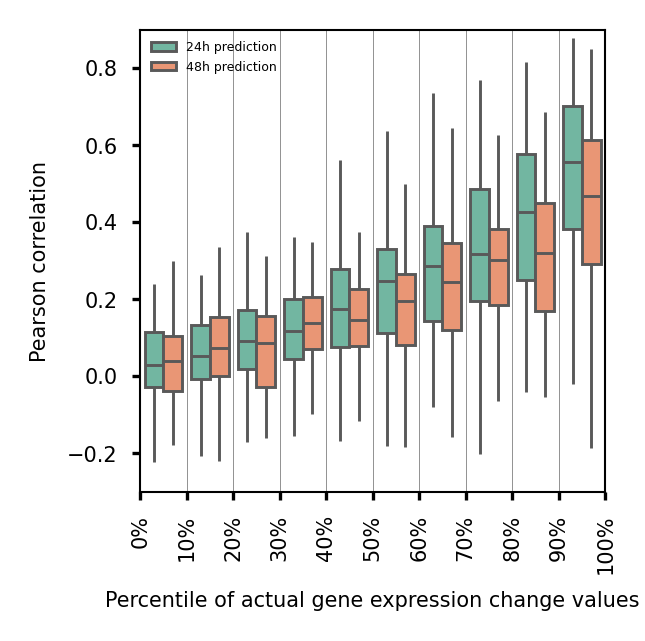

In [5]:
fig,ax =plt.subplots(figsize=(2,2))

ax.vlines(np.arange(0,11)-0.5, -3, 3, colors='grey', linewidth=0.2)
sns.boxplot(x="label", y="pcc", hue="type", data=plot_df, ax=ax, width=0.8, fliersize=0, linewidth=0.7, showcaps=False, palette='Set2') 

ax.set_xticks(np.arange(0,11)-0.5)
ax.set_xticklabels([str(i*10)+"%" for i in np.arange(0,11)], rotation=90)

ax.set_xlabel('Percentile of actual gene expression change values', fontsize=5)
ax.set_ylabel('Pearson correlation', fontsize=5)

ax.tick_params(axis='x', direction='out', length=2) 
ax.tick_params(axis='y', direction='out', length=2)  

ax.set_ylim(-0.3, 0.9)

plt.legend(title="")
plt.show()


# Figure 3C&D

In [3]:
# Read data
chemCPA_random_split_path = DATA_DIR / f"result_2025/Benchmark/chemCPA/performance_result_random_split.pkl"
chemCPA_cell_blind_path = DATA_DIR / f"result_2025/Benchmark/chemCPA/performance_result_cell_blind.pkl"
chemCPA_chemical_blind_path = DATA_DIR / f"result_2025/Benchmark/chemCPA/performance_result_chemical_blind.pkl"

alphaTherapy_path = DATA_DIR / f"result_2025/Benchmark/state_transition_model/performance.pkl"

scgen_cell_blind_path = DATA_DIR / f"result_2025/Benchmark/scGen/scgen.pkl"

with open(chemCPA_random_split_path, "rb") as f:
    chemCPA_random_split_r2_scores, chemCPA_random_split_pcc_scores, chemCPA_random_split_rmse_scores = pickle.load(f)

with open(chemCPA_cell_blind_path, "rb") as f:
    chemCPA_cell_blind_r2_scores, chemCPA_cell_blind_pcc_scores, chemCPA_cell_blind_rmse_scores = pickle.load(f)

with open(chemCPA_chemical_blind_path, "rb") as f:
    chemCPA_chemical_blind_r2_scores, chemCPA_chemical_blind_pcc_scores, chemCPA_chemical_blind_rmse_scores = pickle.load(f)

with open(alphaTherapy_path, "rb") as f:
    alphaTherapy_random_split_r2_scores, alphaTherapy_random_split_pcc_scores, alphaTherapy_random_split_rmse_scores, alphaTherapy_cell_blind_r2_scores, alphaTherapy_cell_blind_pcc_scores, alphaTherapy_cell_blind_rmse_scores, alphaTherapy_chemical_blind_r2_scores, alphaTherapy_chemical_blind_pcc_scores, alphaTherapy_chemical_blind_rmse_scores = pickle.load(f)

with open(scgen_cell_blind_path, "rb") as f:
    scGen_cell_blind_r2_scores, scGen_cell_blind_pcc_scores, scGen_cell_blind_rmse_scores = pickle.load(f)

# preprocess data
models = ["chemCPA", "alphaTherapy", "scGen"]
scenarios = ["random_split", "chemical_blind", "cell_blind"]
metrics = ["R²", "PCC", "RMSE"]

data_dict = {
    "R²": {
        "random_split": [chemCPA_random_split_r2_scores, alphaTherapy_random_split_r2_scores, None],
        "cell_blind": [chemCPA_cell_blind_r2_scores, alphaTherapy_cell_blind_r2_scores, scGen_cell_blind_r2_scores],
        "chemical_blind": [chemCPA_chemical_blind_r2_scores, alphaTherapy_chemical_blind_r2_scores, None],
    },
    "PCC": {
        "random_split": [chemCPA_random_split_pcc_scores, alphaTherapy_random_split_pcc_scores, None],
        "cell_blind": [chemCPA_cell_blind_pcc_scores, alphaTherapy_cell_blind_pcc_scores, scGen_cell_blind_pcc_scores],
        "chemical_blind": [chemCPA_chemical_blind_pcc_scores, alphaTherapy_chemical_blind_pcc_scores, None],
    },
    "RMSE": {
        "random_split": [chemCPA_random_split_rmse_scores, alphaTherapy_random_split_rmse_scores, None],
        "cell_blind": [chemCPA_cell_blind_rmse_scores, alphaTherapy_cell_blind_rmse_scores, scGen_cell_blind_rmse_scores],
        "chemical_blind": [chemCPA_chemical_blind_rmse_scores, alphaTherapy_chemical_blind_rmse_scores, None],
    },
}

In [4]:
def bootstrap_confidence_interval(data, num_bootstrap=1000, confidence_level=0.95):
    bootstrap_samples = np.random.choice(data, (num_bootstrap, len(data)), replace=True)
    bootstrap_means = np.mean(bootstrap_samples, axis=1)
    lower = np.percentile(bootstrap_means, (1 - confidence_level) / 2 * 100)
    upper = np.percentile(bootstrap_means, (1 + confidence_level) / 2 * 100)
    return lower, upper



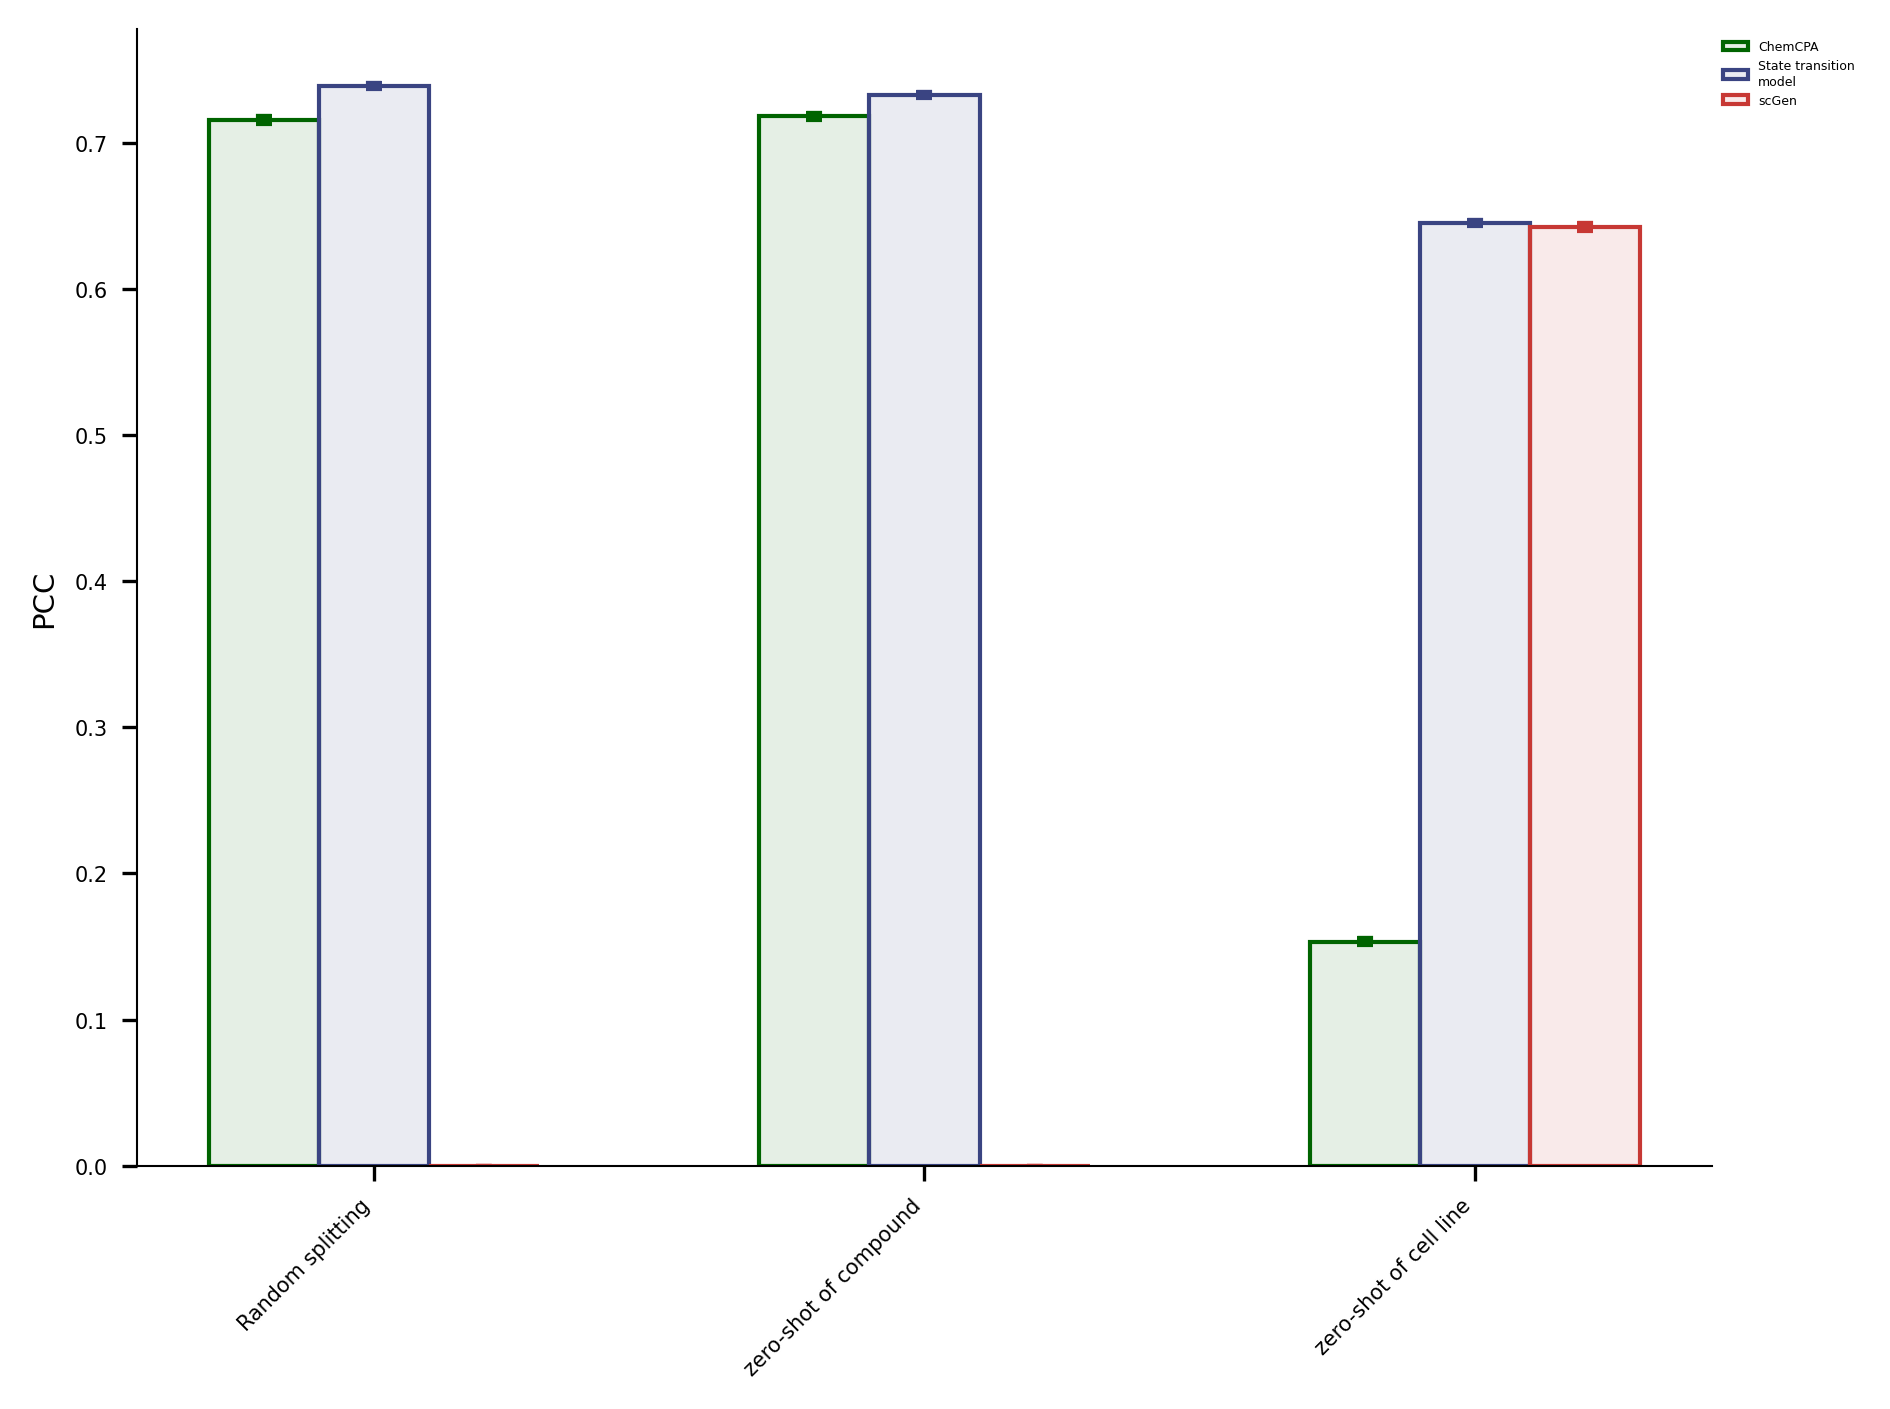

In [5]:
fig, ax = plt.subplots() 
metric = metrics[1]

x_pos = np.arange(len(scenarios))  
bar_width = 0.2 

colors = ["#006400", '#3A4482', '#C73834']

for i, model in enumerate(models):
    means = []
    errors = []
    for scenario in scenarios:
        if data_dict[metric][scenario][i] is not None:
            scores = data_dict[metric][scenario][i]
            mean_score = np.mean(scores)
            lower, upper = bootstrap_confidence_interval(scores)
            ci = (upper - lower) / 2 
            means.append(mean_score)
            errors.append(ci)
        else:
            means.append(0)  
            errors.append(0)
    
    bars = ax.bar(
        x_pos + i * bar_width, 
        means, 
        width=bar_width, 
        capsize=1,          
        edgecolor=colors[i],
        color=colors[i],
        linewidth=1,
        label=["ChemCPA", "State transition\nmodel", "scGen"][i],
    )

    for x, (mean, error) in enumerate(zip(means, errors)):
        ax.errorbar(
            x + i * bar_width, mean, yerr=[[error], [error]], fmt=' ', 
            elinewidth=1, color=colors[i], capsize=2
        )
        
        cap_width = 0.01  
        ax.plot(
            [x + i * bar_width - cap_width, x + i * bar_width + cap_width], 
            [mean + error, mean + error], 
            color=colors[i], linewidth=1
        )

    for patch in bars:
        r, g, b, a = patch.get_facecolor()
        patch.set_facecolor((r, g, b, 0.1))
    

ax.set_xticks(x_pos + bar_width * (len(models) - 1) / 2)
# ax.set_xticklabels(scenarios)
ax.set_xticklabels(["Random splitting", "zero-shot of compound", "zero-shot of cell line"],rotation=45,ha ='right')
ax.set_ylabel(metric)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

ax.legend(
    loc='upper left',  
    bbox_to_anchor=(1, 1),  
    ncol=1  
)

plt.tight_layout()
plt.show()


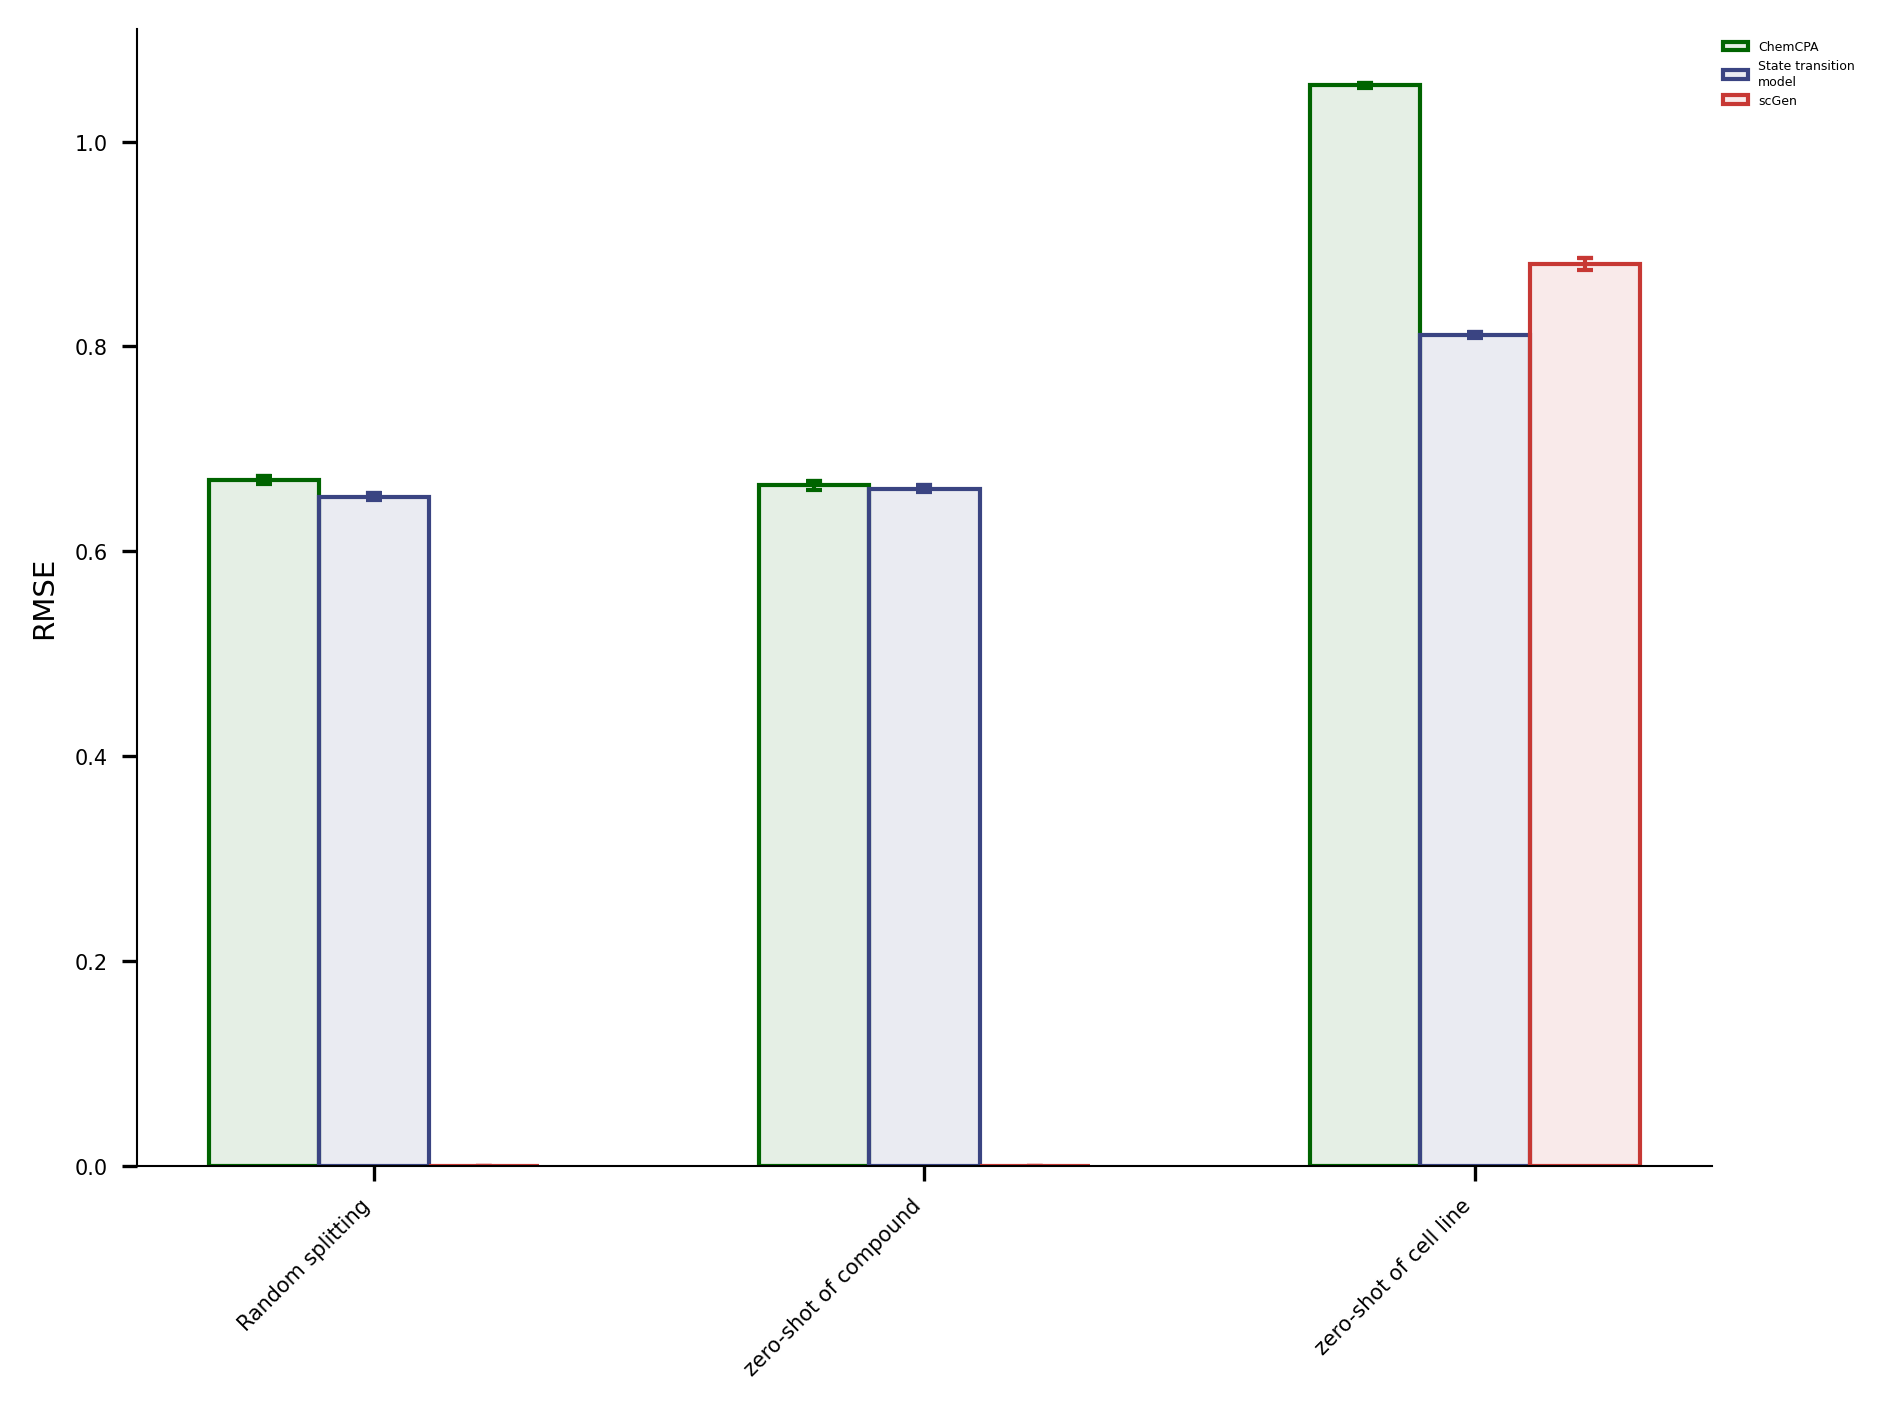

In [6]:
fig, ax = plt.subplots() 
metric = metrics[2]

x_pos = np.arange(len(scenarios))  
bar_width = 0.2 

colors = ["#006400", '#3A4482', '#C73834']

for i, model in enumerate(models):
    means = []
    errors = []
    for scenario in scenarios:
        if data_dict[metric][scenario][i] is not None:
            scores = data_dict[metric][scenario][i]
            mean_score = np.mean(scores)
            lower, upper = bootstrap_confidence_interval(scores)
            ci = (upper - lower) / 2 
            means.append(mean_score)
            errors.append(ci)
        else:
            means.append(0)  
            errors.append(0)
    
    bars = ax.bar(
        x_pos + i * bar_width, 
        means, 
        width=bar_width, 
        capsize=1,          
        edgecolor=colors[i],
        color=colors[i],
        linewidth=1,
        label=["ChemCPA", "State transition\nmodel", "scGen"][i],
    )

    for x, (mean, error) in enumerate(zip(means, errors)):
        ax.errorbar(
            x + i * bar_width, mean, yerr=[[error], [error]], fmt=' ', 
            elinewidth=1, color=colors[i], capsize=2
        )
        
        cap_width = 0.01  
        ax.plot(
            [x + i * bar_width - cap_width, x + i * bar_width + cap_width], 
            [mean + error, mean + error], 
            color=colors[i], linewidth=1
        )

    for patch in bars:
        r, g, b, a = patch.get_facecolor()
        patch.set_facecolor((r, g, b, 0.1))
    

ax.set_xticks(x_pos + bar_width * (len(models) - 1) / 2)
# ax.set_xticklabels(scenarios)
ax.set_xticklabels(["Random splitting", "zero-shot of compound", "zero-shot of cell line"],rotation=45,ha ='right')
ax.set_ylabel(metric)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

ax.legend(
    loc='upper left',  
    bbox_to_anchor=(1, 1),  
    ncol=1  
)

plt.tight_layout()
plt.show()


# Figure3E

In [26]:
# Load data
plot_data_path = DATA_DIR / "result_2025" / "cell_viability_model" / "cv_result.pkl"
with open(plot_data_path,"rb") as f:
    pcc = pickle.load(f)

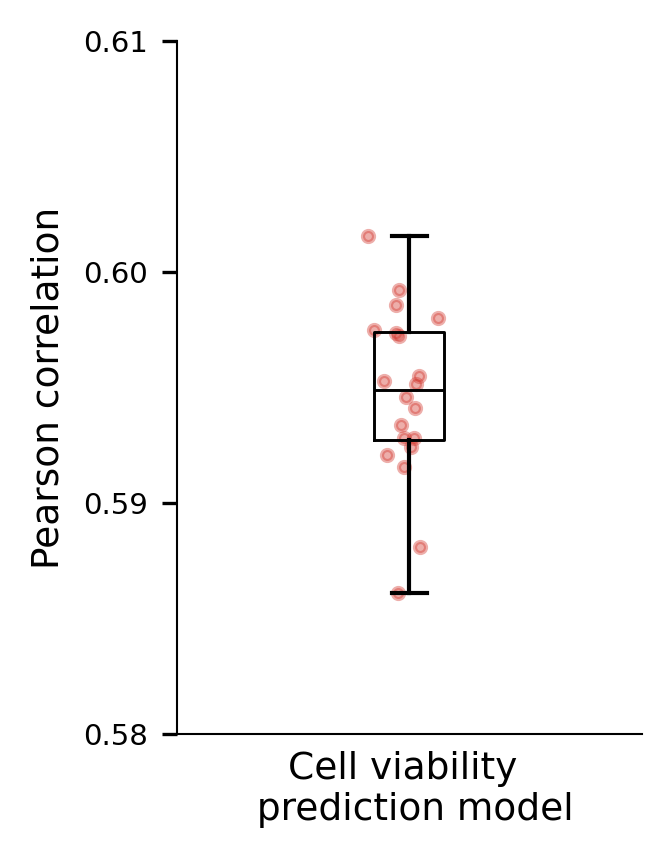

In [27]:
xs = np.random.normal(1, 0.04, len(pcc)) # adds jitter to the data points - can be adjusted

# Create boxplot

boxprops = dict(linestyle='-', linewidth=0.7, color='black')
whiskerprops = dict(color='black')
capprops = dict(color='black')
medianprops = dict(linewidth=0.7, linestyle='-', color='black')

fig, ax = plt.subplots(figsize=(2, 3))
bp = ax.boxplot(pcc, showmeans=False,
                boxprops=boxprops, whiskerprops=whiskerprops, medianprops=medianprops)
ax.scatter(xs, pcc, alpha=0.4, color="#D2352C", s=7)
ax.set_title('')

ax.set_ylim(0.58, 0.61)
ax.set_xticks([])
ax.set_yticks(np.arange(0.58, 0.61, 0.01))

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

ax.set_xlabel('Cell viability \n prediction model', fontsize=9)
ax.set_ylabel('Pearson correlation', fontsize=9)
ax.tick_params(axis='y', labelsize=7)
plt.show()

# Save figure (optional)
# fig.savefig(fig_name, dpi=300, bbox_inches='tight')
